### <font color='darkred'> HW9
* Create and display six dendrograms on the Covid data in a 3 by 2 subplots that use single, complete, average, weighted, centroid and ward linkage functions 

In [2]:
import os
os.chdir('C:\\Users\gmoor\Documents\Economic Analytics 1\Data')

import numpy as np
import pandas as pd
import math

In [5]:
raw0 = pd.read_csv('covid.csv')
raw0.head()

,state,positivelast7per1k,testpositivitylast7
0,AK,4.333295,0.061600
1,AL,2.184091,0.188831
2,AR,2.277153,0.102638
3,AZ,1.470177,0.116040
4,CA,0.853508,0.029735


In [6]:
raw0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                50 non-null     object 
 1   positivelast7per1k   50 non-null     float64
 2   testpositivitylast7  50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [8]:
# Defining X as the numeric column
X = raw0[['positivelast7per1k', 'testpositivitylast7']]

X.head()

,positivelast7per1k,testpositivitylast7
0,4.333295,0.061600
1,2.184091,0.188831
2,2.277153,0.102638
3,1.470177,0.116040
4,0.853508,0.029735


In [11]:
# Scaling X
from sklearn.preprocessing import StandardScaler

Xn = StandardScaler().fit_transform(X)

Xn

array([[ 0.81186246, -0.42544973],
       [-0.19647633,  0.76081869],
       [-0.15281458, -0.04282679],
       [-0.53142221,  0.08213548],
       [-0.82074369, -0.72254667],
       [ 0.06426255, -0.31338302],
       [-0.54281844, -0.72170883],
       [-0.60494876, -0.63663275],
       [-0.55499381, -0.48720127],
       [-0.67426114, -0.26941822],
       [-1.01739413, -0.83099769],
       [ 0.77931913,  2.32238268],
       [ 0.59950276,  2.24375   ],
       [ 0.57939518, -0.26009217],
       [ 0.28788493, -0.22279074],
       [ 0.22031206,  2.14713988],
       [ 0.16101228,  0.11111782],
       [-0.70476171, -0.57335697],
       [-0.52558166, -0.83564577],
       [-0.70449585, -0.71520524],
       [-1.01944421, -0.89032997],
       [-0.19733134, -0.38700321],
       [ 0.32201637, -0.17946565],
       [ 0.16115094,  0.14792602],
       [-0.3680199 , -0.37008069],
       [ 1.56763524,  0.57255928],
       [-0.39808676, -0.40054704],
       [ 3.80811574,  0.16726301],
       [ 0.77296905,

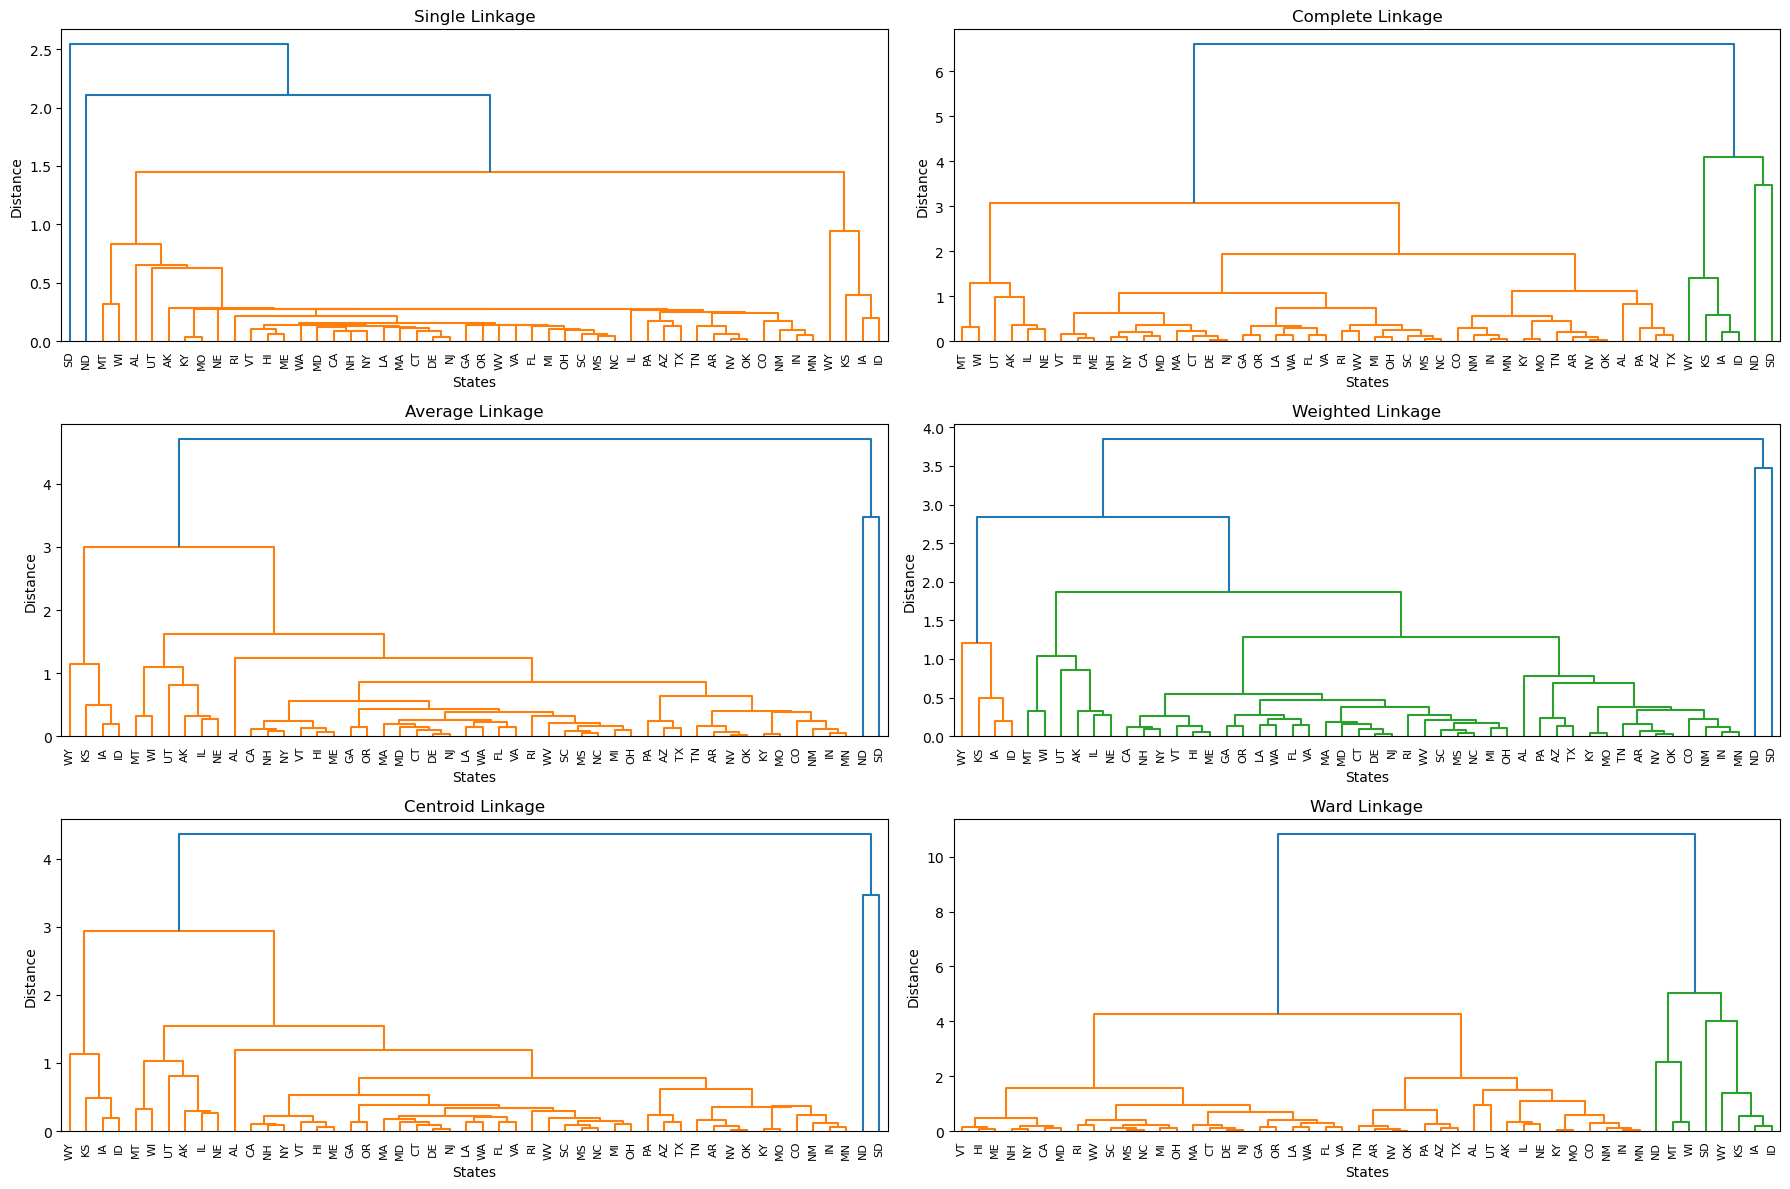

In [12]:
# Generating and plotting dendrograms
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12)) # Single figure for all subplots

methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'ward'] # Linkage methods

for i, method in enumerate(methods, 1): 
    plt.subplot(3, 2, i) # 3x2 subplot format
    Z = hierarchy.linkage(Xn, method)
    hierarchy.dendrogram(Z, labels=raw0['state'].tolist(), leaf_rotation=90, leaf_font_size=8)
    plt.title(f"{method.capitalize()} Linkage") # Dendrogram title
    plt.xlabel("States")
    plt.ylabel("Distance")

plt.tight_layout() # Prevent overlapping
plt.show()